***Import Needed Libs***

In [2]:
import os
from PIL import Image
import itertools

#import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Activation, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

print('Modules Loaded')

Modules Loaded


***Preprocessing Train Dataset***

In [4]:
train_data_path = r"E:\Sai\C19_P_TB\Dataset\Dataset_1\Train"
filepaths = []
labels = []

folds = os.listdir(train_data_path)
for fold in folds:
    foldpath = os.path.join(train_data_path, fold)
    filelist = os.listdir(foldpath)
    
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)
        
FSeries = pd.Series(filepaths, name='filepaths')
LSeries = pd.Series(labels, name='label')

df = pd.concat([FSeries, LSeries], axis=1)

In [5]:
df

,filepaths,label
0,E:\Sai\C19_P_TB\Dataset\Dataset_1\Train\Covid1...,Covid19
1,E:\Sai\C19_P_TB\Dataset\Dataset_1\Train\Covid1...,Covid19
2,E:\Sai\C19_P_TB\Dataset\Dataset_1\Train\Covid1...,Covid19
3,E:\Sai\C19_P_TB\Dataset\Dataset_1\Train\Covid1...,Covid19
4,E:\Sai\C19_P_TB\Dataset\Dataset_1\Train\Covid1...,Covid19
...,...,...
15237,E:\Sai\C19_P_TB\Dataset\Dataset_1\Train\Tuberc...,Tuberculosis
15238,E:\Sai\C19_P_TB\Dataset\Dataset_1\Train\Tuberc...,Tuberculosis
15239,E:\Sai\C19_P_TB\Dataset\Dataset_1\Train\Tuberc...,Tuberculosis
15240,E:\Sai\C19_P_TB\Dataset\Dataset_1\Train\Tuberc...,Tuberculosis


***Preprocessing Valid Dataset***

In [7]:
valid_data_dir = r"E:\Sai\C19_P_TB\Dataset\Dataset_1\Valid"
filepaths = []
labels = []

folds = os.listdir(valid_data_dir)
for fold in folds:
    foldpath = os.path.join(valid_data_dir, fold)
    filelist = os.listdir(foldpath)
    
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)
        
FSeries = pd.Series(filepaths, name='filepaths')
LSeries = pd.Series(labels, name='label')

valid = pd.concat([FSeries, LSeries], axis=1)

In [8]:
valid

,filepaths,label
0,E:\Sai\C19_P_TB\Dataset\Dataset_1\Valid\Covid1...,Covid19
1,E:\Sai\C19_P_TB\Dataset\Dataset_1\Valid\Covid1...,Covid19
2,E:\Sai\C19_P_TB\Dataset\Dataset_1\Valid\Covid1...,Covid19
3,E:\Sai\C19_P_TB\Dataset\Dataset_1\Valid\Covid1...,Covid19
4,E:\Sai\C19_P_TB\Dataset\Dataset_1\Valid\Covid1...,Covid19
...,...,...
1916,E:\Sai\C19_P_TB\Dataset\Dataset_1\Valid\Tuberc...,Tuberculosis
1917,E:\Sai\C19_P_TB\Dataset\Dataset_1\Valid\Tuberc...,Tuberculosis
1918,E:\Sai\C19_P_TB\Dataset\Dataset_1\Valid\Tuberc...,Tuberculosis
1919,E:\Sai\C19_P_TB\Dataset\Dataset_1\Valid\Tuberc...,Tuberculosis


***Preprocessing Test Dataset***

In [10]:
test_data_dir = r"E:\Sai\C19_P_TB\Dataset\Dataset_1\Test"
filepaths = []
labels = []

folds = os.listdir(test_data_dir)

for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)
        
FSeries = pd.Series(filepaths, name='filepaths')
LSeries = pd.Series(labels, name='label')

test = pd.concat([FSeries, LSeries], axis=1)

In [11]:
test

,filepaths,label
0,E:\Sai\C19_P_TB\Dataset\Dataset_1\Test\COVID19...,COVID19
1,E:\Sai\C19_P_TB\Dataset\Dataset_1\Test\COVID19...,COVID19
2,E:\Sai\C19_P_TB\Dataset\Dataset_1\Test\COVID19...,COVID19
3,E:\Sai\C19_P_TB\Dataset\Dataset_1\Test\COVID19...,COVID19
4,E:\Sai\C19_P_TB\Dataset\Dataset_1\Test\COVID19...,COVID19
...,...,...
1456,E:\Sai\C19_P_TB\Dataset\Dataset_1\Test\Tubercu...,Tuberculosis
1457,E:\Sai\C19_P_TB\Dataset\Dataset_1\Test\Tubercu...,Tuberculosis
1458,E:\Sai\C19_P_TB\Dataset\Dataset_1\Test\Tubercu...,Tuberculosis
1459,E:\Sai\C19_P_TB\Dataset\Dataset_1\Test\Tubercu...,Tuberculosis


***Spliting Data Into Train, Valid, Test***

In [13]:
train_df, dummy_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)
valid_df, test_df = train_test_split(dummy_df, train_size=0.5, shuffle=True, random_state=42)

***ImageDataGenerator***

In [15]:
# crobed image size
batch_size =126
img_size = (224, 224)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
val_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'label', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = val_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'label', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'label', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 12193 validated image filenames belonging to 4 classes.
Found 1524 validated image filenames belonging to 4 classes.
Found 1525 validated image filenames belonging to 4 classes.


***Showing Sample From Data***

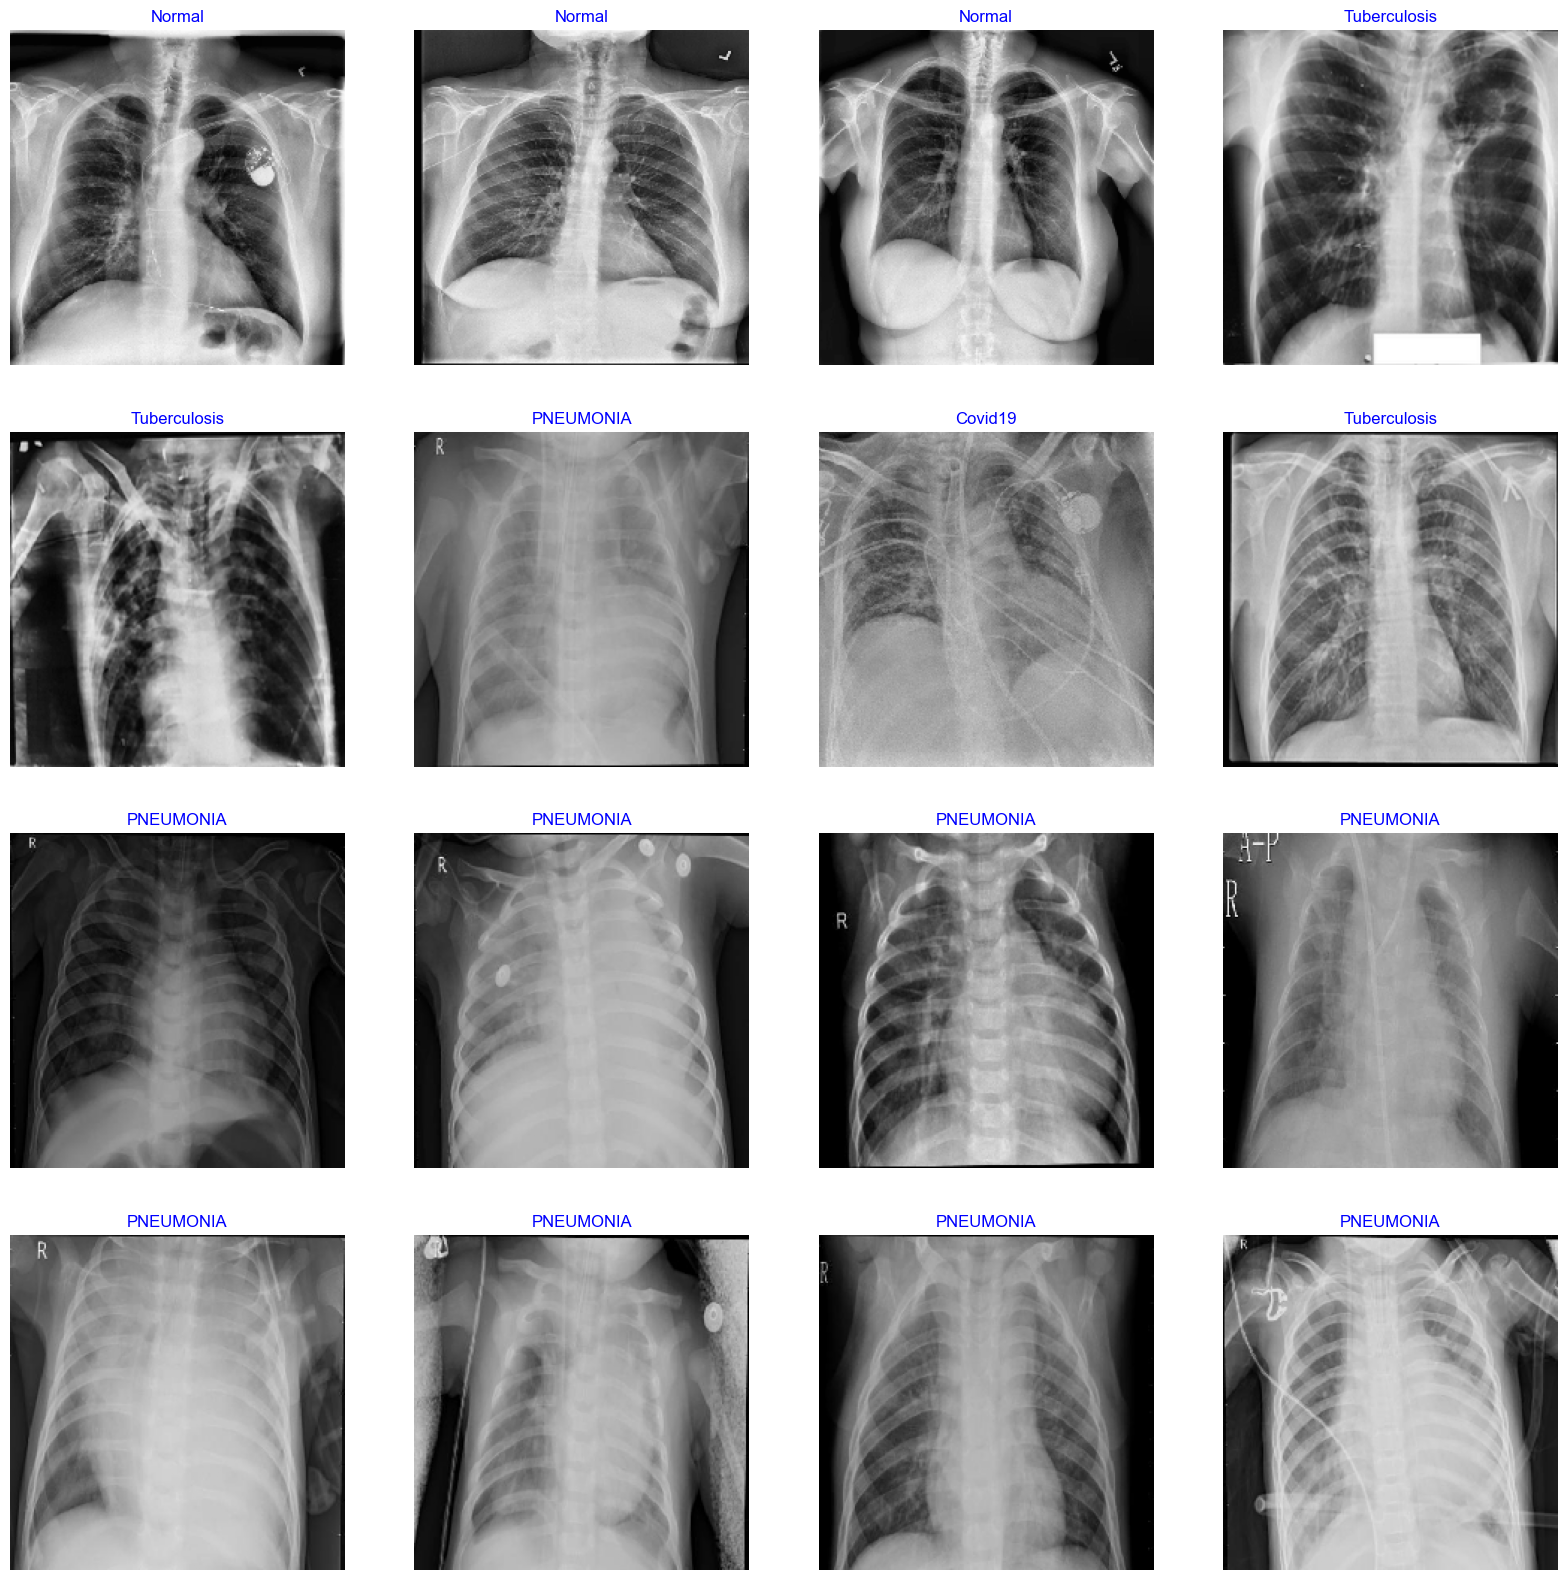

In [17]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'blue' , fontsize= 12)
    plt.axis('off')
plt.show();

***Model Structure***

In [19]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(class_count, activation='sigmoid')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,398,148 (169.37 MB)

 Trainable params: 44,398,148 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

### Training The Data

In [21]:
history = model.fit(train_gen, epochs= 10, validation_data= valid_gen, batch_size=256)

Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 835s 8s/step - accuracy: 0.6734 - loss: 214.6560 - val_accuracy: 0.9409 - val_loss: 0.1958
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 671s 7s/step - accuracy: 0.9478 - loss: 0.1691 - val_accuracy: 0.9646 - val_loss: 0.1259
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 622s 6s/step - accuracy: 0.9700 - loss: 0.0900 - val_accuracy: 0.9731 - val_loss: 0.0859
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 581s 6s/step - accuracy: 0.9849 - loss: 0.0471 - val_accuracy: 0.9777 - val_loss: 0.0799
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 541s 5s/step - accuracy: 0.9894 - loss: 0.0357 - val_accuracy: 0.9751 - val_loss: 0.0859
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 559s 6s/step - accuracy: 0.9937 - loss: 0.0246 - val_accuracy: 0.9777 - val_loss: 0.0710
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 644s 6s/step - accuracy: 0.9944 - loss: 0.0195 - val_accuracy: 0.9816 - val_loss: 0.0679
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 500s 5s/step - accuracy: 0.9956 - loss: 0.0168 - val_accuracy: 0.9790 -

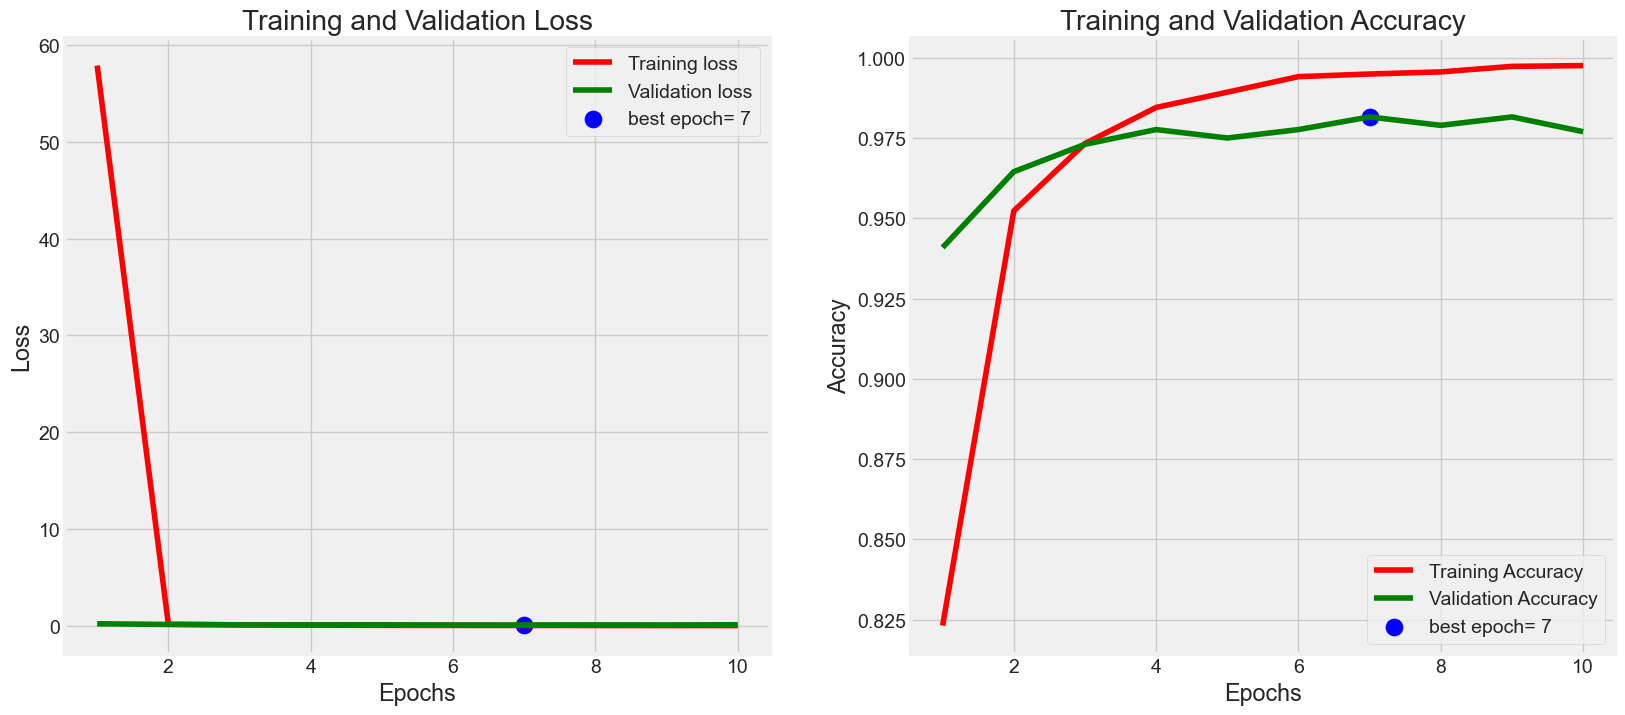

In [22]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

### Model Evaluation

In [24]:
train_score = model.evaluate(train_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)
test_score = model.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

97/97 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 1.0000 - loss: 0.0016
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9766 - loss: 0.1029
13/13 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - accuracy: 0.9816 - loss: 0.0587
Train Loss:  0.0018867633771151304
Train Accuracy:  0.9999179840087891
--------------------
Validation Loss:  0.09332223981618881
Validation Accuracy:  0.9770340919494629
--------------------
Test Loss:  0.07126951217651367
Test Accuracy:  0.9829508066177368


In [26]:
model.save('All_3_Detection.keras')

In [32]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1) 

13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step


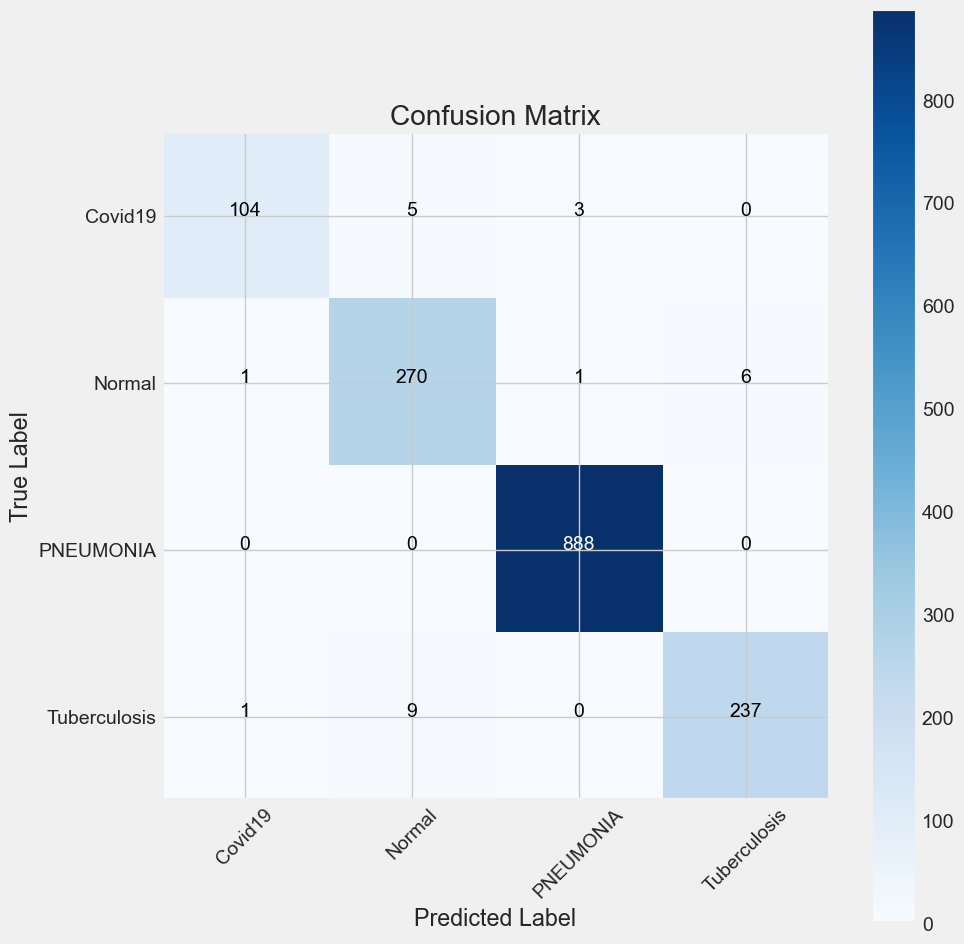

In [34]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
cm

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [36]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

     Covid19       0.98      0.93      0.95       112
      Normal       0.95      0.97      0.96       278
   PNEUMONIA       1.00      1.00      1.00       888
Tuberculosis       0.98      0.96      0.97       247

    accuracy                           0.98      1525
   macro avg       0.98      0.96      0.97      1525
weighted avg       0.98      0.98      0.98      1525



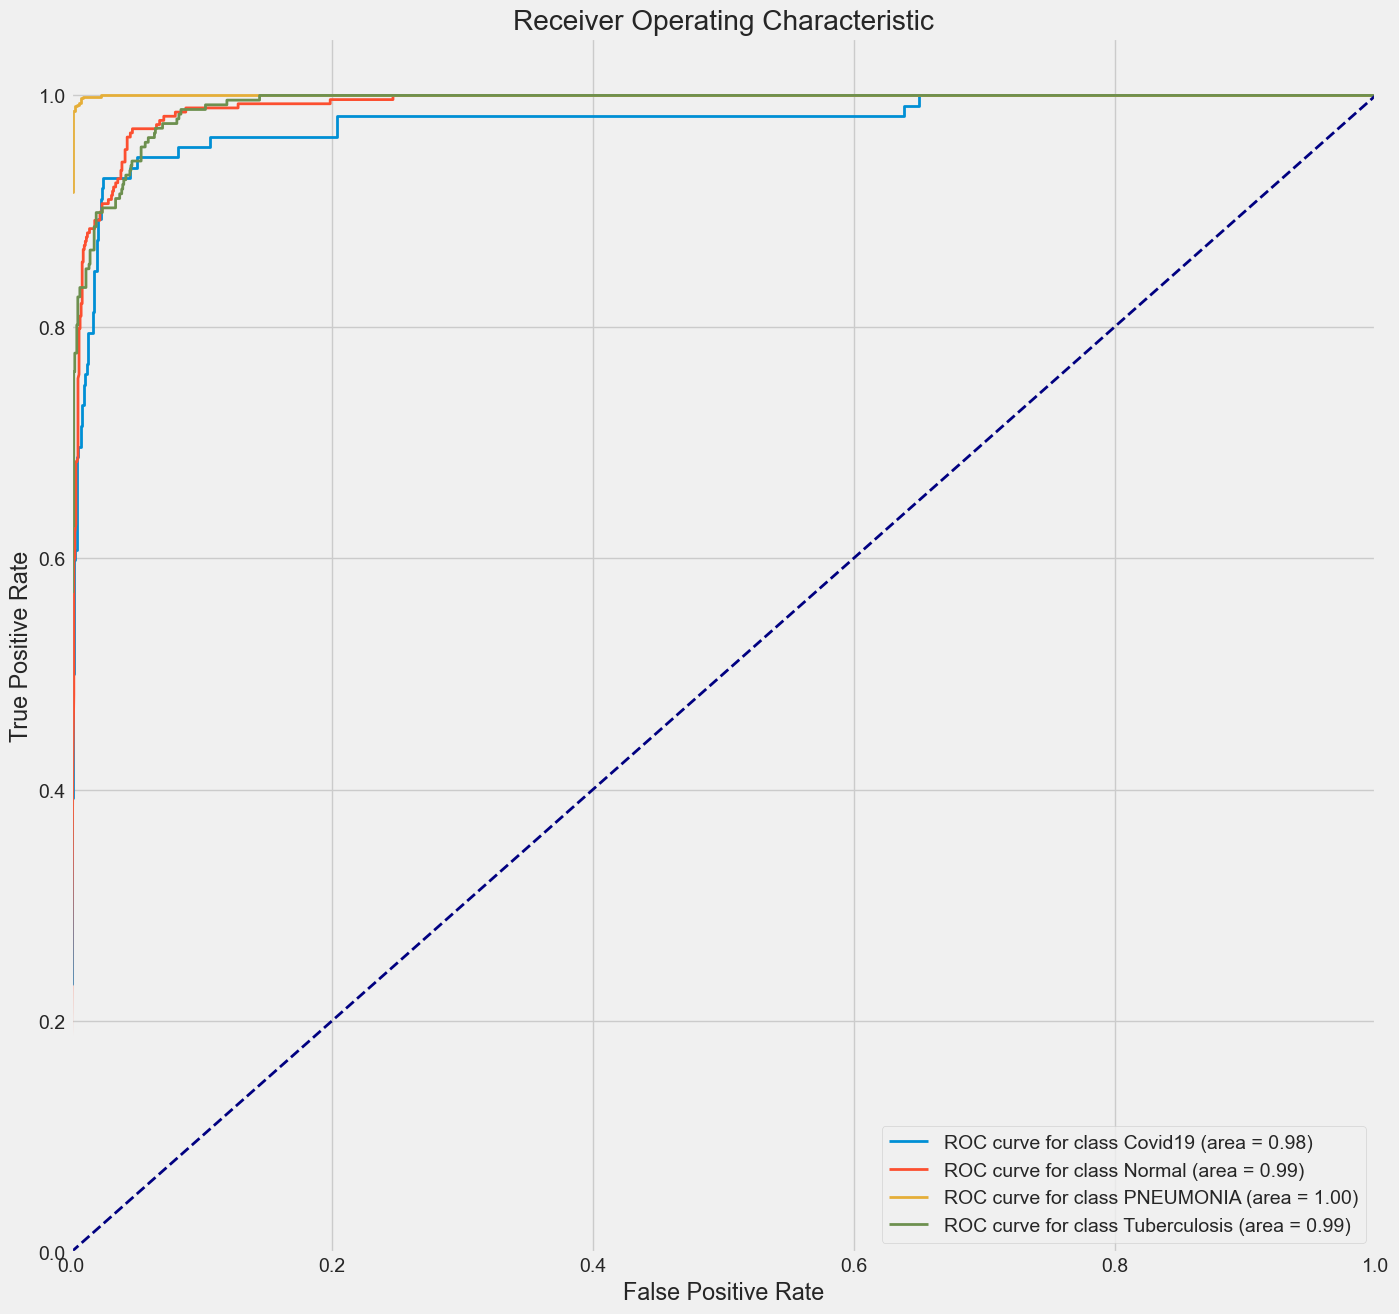

In [44]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

classes=['Covid19', 'Normal', 'PNEUMONIA', 'Tuberculosis']

num_classes = len(classes)

# Binarize the true labels
Y_true_binarized = label_binarize(test_gen.classes, classes=range(num_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    if i < preds.shape[1]:  # Ensure we don't go out of bounds
        fpr[i], tpr[i], _ = roc_curve(Y_true_binarized[:, i], preds[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(15,15))

for i in range(num_classes):
    if i in fpr:  # Only plot if the ROC curve was computed
        plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class {classes[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()